# Feuille 2 - UE Projet CMI-L1
Reading files with Pandas, ploting and fitting data

In [1]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data 
# structures designed to make working with “relational” or “labeled” data 
# both easy and intuitive. 

## I) Files : reading typical format files
we propose to work with some column data :
* csv : column data delimited by "," or ";" with headers
* txt : column data delimited by spaces with headers
* raw : column data delimited by spaces without headers
* dat : column data formatted delimited by spaces
* xlsx : excel data

### a) CSV files

In [2]:
!cat data.csv






5;24;0.2

In [3]:
# read file
d = pd.read_csv("data.csv",delimiter=";")
print(d)

   x   y   er
0  1   1  0.2
1  2   4  0.2
2  3   8  0.3
3  4  17  0.4
4  5  24  0.2


### b) Raw files with headers

In [4]:
# text files
!cat data.txt

In [5]:
# read file
dtext = pd.read_csv("data.txt")
print(dtext)

    x y er
0  1 1 0.2
1  2 4 0.2
2  3 8 0.3


### c) Raw files without headers

In [6]:
# raw values
!cat data.raw

In [7]:
# read raw file
draw = pd.read_csv("data.raw",delimiter=" ", header = None)
print(draw)

   0  1    2
0  1  1  0.2
1  2  4  0.2
2  3  8  0.3


### d) Formatted file

In [8]:
# read raw file
fwidths = [11,10]
dexpe = pd.read_fwf("expe.dat",delimiter=" ",header = None, widths = fwidths)
print(dexpe)

         0         1
0      0.0  0.894520
1    100.0  0.849616
2    200.0  0.806313
3    300.0  0.763861
4    400.0  0.722299
5    500.0  0.681680
6    600.0  0.642211
7    700.0  0.603411
8    800.0  0.565199
9    900.0  0.528873
10  1000.0  0.492817


### e) Excel data

In [9]:
d = pd.read_excel("data.xlsx")
print(d)

  data Unnamed: 1 Unnamed: 2
0    x          y         er
1    1          1        0.2
2    2          4        0.2
3    3          8        0.3
4    4         17        0.4
5    5         24        0.2


### More formats
see references https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html

In [10]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="02_io_readwrite.svg", width=800, height=500)

## II) Filling variables

In [11]:
# read file
d = pd.read_csv("data.csv",delimiter=";")
print(d)

   x   y   er
0  1   1  0.2
1  2   4  0.2
2  3   8  0.3
3  4  17  0.4
4  5  24  0.2


We can use **headers** or **column numbers** to fill the variables

In [12]:
# taking values from headers
x=d["x"]
y=d["y"]
e=d["er"]
print(x,y,e)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     1
1     4
2     8
3    17
4    24
Name: y, dtype: int64 0    0.2
1    0.2
2    0.3
3    0.4
4    0.2
Name: er, dtype: float64


In [13]:
# taking values from colon  .iloc[row,col] or .loc[row,col]
x=d.iloc[:,0]
y=d.iloc[:,1]
e=d.iloc[:,2]
print(x,y,e)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     1
1     4
2     8
3    17
4    24
Name: y, dtype: int64 0    0.2
1    0.2
2    0.3
3    0.4
4    0.2
Name: er, dtype: float64


## III) Plotting data

In [14]:
import matplotlib.pyplot as plt

In [15]:
# read raw file
fwidths = [11,10]
dexpe = pd.read_fwf("expe.dat",delimiter=" ",header = None, widths = fwidths)
print(dexpe)

         0         1
0      0.0  0.894520
1    100.0  0.849616
2    200.0  0.806313
3    300.0  0.763861
4    400.0  0.722299
5    500.0  0.681680
6    600.0  0.642211
7    700.0  0.603411
8    800.0  0.565199
9    900.0  0.528873
10  1000.0  0.492817


In [16]:
# get x and y
x=dexpe.iloc[:,0]
y=dexpe.iloc[:,1]

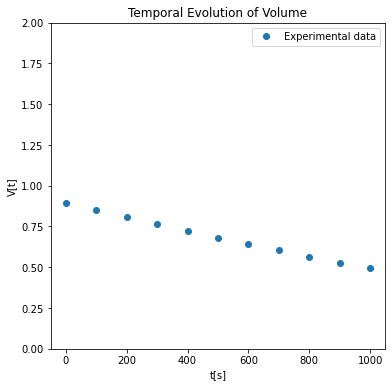

In [17]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y,"o",label="Experimental data")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

## IV) Fitting data : linear

In [18]:
from scipy.optimize import curve_fit
import numpy as np

In [19]:
def func(x, a, b):
    return a * x + b

In [20]:
popt= curve_fit(func, x, y)
print(popt)

(array([-4.01437909e-04,  8.87155318e-01]), array([[ 1.96723961e-11, -9.83619802e-09],
       [-9.83619802e-09,  6.88533863e-06]]))


In [21]:
[a,b]=popt[0]

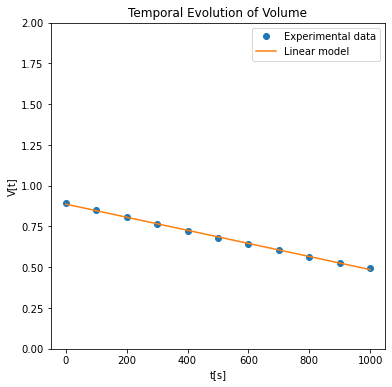

In [22]:
fig = plt.figure(figsize=(6,6)) # 
ax = plt.subplot() 
ax.plot(x,y,"o",label="Experimental data")
ax.plot(x,func(x,*popt[0]),label="Linear model")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

## V) Fitting data : non linear

In [23]:
# read raw file
fwidths = [6,6,6]
dexpe = pd.read_fwf("power.dat",delimiter=" ",header = None, widths = fwidths)
dexpe.head()

0      1      2
0  0.102  0.319  0.565
1  0.204  0.452  0.672
2  0.306  0.553  0.744
3  0.408  0.639  0.799
4  0.510  0.714  0.845

In [24]:
# get x and y
x =dexpe.iloc[:,0]
y1=dexpe.iloc[:,1]
y2=dexpe.iloc[:,2]

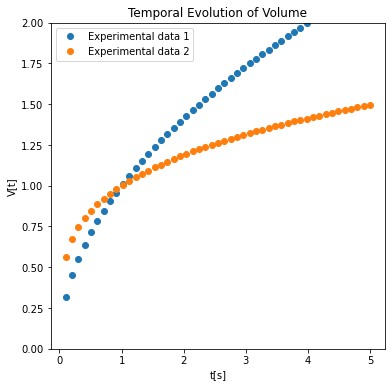

In [25]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,y2,"o",label="Experimental data 2")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

### log-log

[]

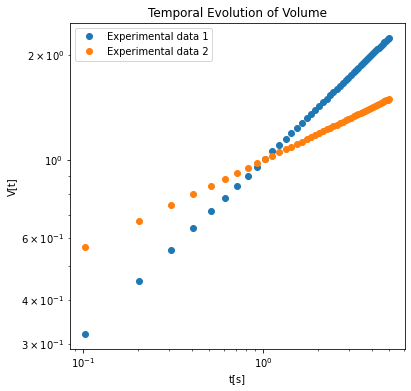

In [26]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,y2,"o",label="Experimental data 2")
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()
ax.loglog()

That's because
$$ y = x^a + b $$
gives
$$\log(y) = a \log(x) + \log(b)$$
a linear function en log-log scale

In [27]:
def func(x, a, b):
    return a * x + b

In [28]:
popt= curve_fit(func, np.log(x), np.log(y1))

In [29]:
popt[0]
a=popt[0][0]
b=popt[0][1]
print("%.3f" % a)
print("%.3f" % b)

0.500
-0.000


[]

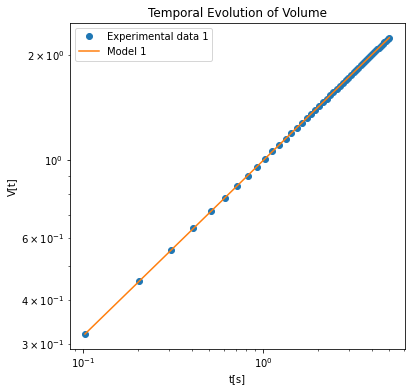

In [30]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,x**a+b,"-",label="Model 1")
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()
ax.loglog()

### VI ) Error bars

In [31]:
# read file
d = pd.read_csv("data.csv",delimiter=";")
print(d.head())
# taking values from headers
x=d["x"]
y=d["y"]
e=d["er"]
#print(x,y,e)

   x   y   er
0  1   1  0.2
1  2   4  0.2
2  3   8  0.3
3  4  17  0.4
4  5  24  0.2


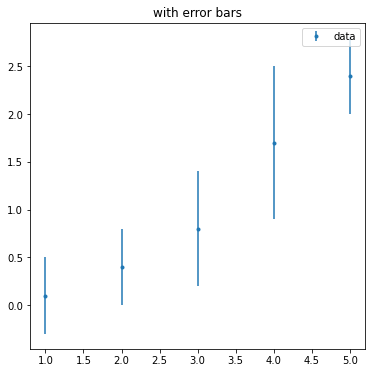

In [32]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(x,0.1*y,e*2, marker='.', linestyle="none", label="data")
ax.set_title("with error bars")
ax.legend()